# Ch 6 (?)

# IMPORTS

In [1]:
import random
import pickle
import glob

import random
import ast

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from collections import Counter

from time import time
from time import sleep
from time import strftime
from time import localtime
from tqdm import tqdm

from datetime import date, timedelta, datetime

# from mydecorators import logger, stopwatch





In [2]:
def streak_counter(llist):
  result_dict = {
    ### 0 for Loss
    0: [],
    ### 1 for Win 
    1: []    
  }

  streak_size = 1

  for i in range(len(llist)):
    if i != len(llist)-1:
      if llist[i] != llist[i+1]:
        result_dict[llist[i]].append(streak_size)
        streak_size = 1

      elif llist[i] == llist[i+1]:
        streak_size += 1
    else:
      result_dict[llist[i]].append(streak_size)

  return result_dict


In [3]:
### function for calulating the average of number of consecutive results
def avg_cal(ddict):
  return np.mean(ddict[0]), np.mean(ddict[1])



In [4]:
### streak generator
#### using list.extend

def streak_gen(streak_size, result_size):    ### number of games
  result_streak = []

  n_games = result_size

  n_games_played = 0

  while n_games_played <= n_games:

    streak_size = streak_size
    streak = random.choices(['WS','LS'], weights=(0.5,0.5))[0]

    if streak == 'WS':
      wr = 0.85
      lr = 0.15
      # print(lr,wr)
      
      streak_games = random.choices([0,1], weights=(lr, wr), k=streak_size)
      result_streak.extend(streak_games)

    else:
      wr = 0.15
      lr = 0.85
      # print(lr,wr)
      streak_games = random.choices([0,1], weights=(lr, wr), k=streak_size)
      result_streak.extend(streak_games)

    n_games_played += streak_size


  return result_streak[:result_size]

In [5]:
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i+1, y[i] ,y[i], fontsize=10)

# Read CSV
* combined_dataset.csv (contains records of 300 games per player, including real players)

In [234]:
df_alldata = pd.read_csv('combined_dataset.csv')

In [235]:
df_alldata.head()

0  1  2  3  4  5  6  7  8  9  ...  292  293  294  295  296  297  298  299  \
0  0  0  1  0  0  0  0  0  0  1  ...    1    0    0    1    0    0    0    1   
1  1  0  1  1  0  0  1  1  0  0  ...    1    0    1    0    1    1    1    0   
2  1  1  1  0  1  0  1  0  0  0  ...    1    0    0    1    0    1    1    0   
3  1  1  1  1  1  1  1  0  1  0  ...    0    1    1    0    0    1    0    1   
4  1  0  0  0  0  0  0  1  1  1  ...    1    0    0    0    1    0    1    1   

   labels        filepaths  
0       2  perfectmm_456_0  
1       2  perfectmm_456_1  
2       2  perfectmm_456_2  
3       2  perfectmm_456_3  
4       2  perfectmm_456_4  

[5 rows x 302 columns]

## Extract Live Data Only

In [236]:
df_live = df_alldata[df_alldata['labels'] == 0]
df_live.head(5)

0  1  2  3  4  5  6  7  8  9  ...  292  293  294  295  296  297  298  \
90000  1  1  1  0  1  1  1  0  1  0  ...    0    1    1    1    0    1    1   
90001  0  1  0  0  0  0  0  0  0  0  ...    1    1    0    0    0    1    1   
90002  1  0  0  1  0  1  1  1  0  1  ...    0    0    0    0    1    1    1   
90003  1  1  1  0  0  1  0  1  1  1  ...    0    1    0    0    1    0    1   
90004  0  0  0  0  0  1  0  0  1  0  ...    0    0    0    1    1    0    0   

       299  labels       filepaths  
90000    0       0     좋은챔프  
90001    1       0     진기장판  
90002    1       0           서맨  
90003    1       0  아오은석시치  
90004    1       0        베베바다  

[5 rows x 302 columns]

In [312]:
df_live.shape

(42127, 302)

In [237]:
42127 * 300

12638100

In [238]:
# df_live.sample(10, random_state=9)

In [239]:
df_live.sample(10, random_state=10).head(5)

0  1  2  3  4  5  6  7  8  9  ...  292  293  294  295  296  297  298  \
128105  0  0  0  0  0  0  0  1  0  1  ...    1    1    1    1    1    0    0   
128363  0  0  1  1  0  0  1  0  1  1  ...    1    0    0    0    0    1    1   
121491  0  1  0  0  0  0  1  1  1  1  ...    0    0    1    0    1    1    0   
114394  1  1  0  1  0  0  1  1  0  0  ...    0    1    1    1    1    1    1   
96111   0  0  0  0  1  1  1  1  1  0  ...    0    0    0    1    1    0    0   

        299  labels           filepaths  
128105    1       0        오젠트리안  
128363    0       0             01수영  
121491    1       0          무현스님  
114394    1       0            fcwasabi  
96111     1       0  제발싸우지말아줘  

[5 rows x 302 columns]

## Flatten into a list of one million games

In [240]:
one_seed = 10

In [241]:
# df_live.sample(3334, random_state=10).iloc[0][[str(x) for x in range(300)]].tolist()
# len(df_live.sample(3334, random_state=10).iloc[0][[str(x) for x in range(300)]].tolist())

# df_live.sample(3334, random_state=10).iloc[0:2][[str(x) for x in range(300)]].to_numpy().flatten()
# len(df_live.sample(3334, random_state=10)[[str(x) for x in range(300)]].to_numpy().flatten())  ### 1000200
# type(df_live.sample(3334, random_state=10)[[str(x) for x in range(300)]].to_numpy().flatten()) ### numpy.ndarray
# list(df_live.sample(3334, random_state=10)[[str(x) for x in range(300)]].to_numpy().flatten())[:100]


# len(list(df_live.sample(3334, random_state=10)[[str(x) for x in range(300)]].to_numpy().flatten())[:100000])
one_million_live = list(df_live.sample(3334, random_state=one_seed)[[str(x) for x in range(300)]].to_numpy().flatten())[:100000]
print(len(one_million_live))

100000


## Use Custom Counter

In [242]:
live_data_counted = streak_counter(one_million_live)

In [243]:
print('MAX MIN of Losing Streaks')
print(np.max(live_data_counted[0]))
print(np.min(live_data_counted[0]))

print('MAX MIN of Win Streaks')
print(np.max(live_data_counted[1]))
print(np.min(live_data_counted[1]))

print('Averages')
print(f'L: {np.mean(live_data_counted[0])}')
print(f'W: {np.mean(live_data_counted[1])}')

print('Standard Deviations')
print(f'L: {np.std(live_data_counted[0])}')
print(f'W: {np.std(live_data_counted[1])}')

MAX MIN of Losing Streaks
16
1
MAX MIN of Win Streaks
17
1
Averages
L: 1.9816387608185715
W: 2.0627704752275027
Standard Deviations
L: 1.4050564445199816
W: 1.5050515575882655


# Generate GAME HISTORIES

## PerfectMM - One Million Games (to use as POPULATION ?)

In [6]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(135)
np.random.seed(135)

# prob_list = np.linspace(0.49,0.51, 100)
prob_list = [0.5]

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

one_million_games = []

# number_of_players = 1000
# games_per_player = 3000
number_of_players = 1
games_per_player = 1000000

for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0
        
        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to one_million_games (3000 players)
    one_million_games.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-07-26 21:12:08



----------------------------------------------------
done in 21.046s.
2024-07-26 21:12:29


In [245]:
# one_million_games[0][:10]

In [246]:
### one_million_games[0][:10]

# perfectmm_counted = streak_counter(one_million_games[0][:])
perfectmm_counted = streak_counter(one_million_games[0])

In [247]:
print('MAX MIN of Losing Streaks')
print(np.max(perfectmm_counted[0]))
print(np.min(perfectmm_counted[0]))

print('MAX MIN of Win Streaks')
print(np.max(perfectmm_counted[1]))
print(np.min(perfectmm_counted[1]))

print('Averages')
print(f'L: {np.mean(perfectmm_counted[0])}')
print(f'W: {np.mean(perfectmm_counted[1])}')

print('Standard Deviations')
print(f'L: {np.std(perfectmm_counted[0])}')
print(f'W: {np.std(perfectmm_counted[1])}')

MAX MIN of Losing Streaks
17
1
MAX MIN of Win Streaks
20
1
Averages
L: 2.003923721884669
W: 2.0039557691305725
Standard Deviations
L: 1.4168229150676865
W: 1.419380547217041


In [248]:
print(f'sum of L streak : {np.sum(perfectmm_counted[0])}')
print(f'sum of W streak : {np.sum(perfectmm_counted[1])}')

sum of L streak : 499995
sum of W streak : 500005


In [249]:
# print(np.max(streak_counter(one_million_games[0][:])[0]))
# print(np.min(streak_counter(one_million_games[0][:])[0]))

# print(np.max(streak_counter(one_million_games[0][:])[1]))
# print(np.min(streak_counter(one_million_games[0][:])[1]))



# print(np.mean(streak_counter(one_million_games[0])[0]))
# print(np.mean(streak_counter(one_million_games[0])[1]))

# print(np.std(streak_counter(one_million_games[0])[0]))
# print(np.std(streak_counter(one_million_games[0])[1]))

In [250]:
# perfectmm_counted[0]

In [251]:
streaks = []

streaks_0 = list(perfectmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(perfectmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))



# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-2, -1, -1, -5, -1, -3, -1, -1, -2, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -4]
-2.003923721884669
1.4168229150676865
[1, 2, 2, 1, 3, 1, 3, 4, 2, 6, 1, 1, 2, 4, 1, 5, 5, 1, 1, 7]
2.0039557691305725
1.419380547217041
----
2.003939745539731e-05
2.4549518663543686


## NearPerfectMM - One Million Games

In [252]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(2237)
np.random.seed(2237)

# random.seed(2297)
# np.random.seed(2297)

prob_list = np.linspace(0.49,0.51, 100)

### when each game is between 49 ~ 51 % (independent)
#### 3000 games per player, 1000 players, totalling 3 million games played

avg_list_0 = []
avg_list_1 = []

nearperfect_all_records = []

number_of_players = 1
games_per_player = 1000000


for _ in range(number_of_players):
    result_n = []

    for _ in range(games_per_player):
        prob_of_0 = random.choice(prob_list)
        prob_of_1 = 1 - prob_of_0

        one_game = np.random.choice([0,1], 1, p = [prob_of_0, prob_of_1])[0]
        result_n.append(one_game)
    
    streak_counter_result = streak_counter(result_n)
    
    ### add to nearperfect_all_records (3000 players)
    nearperfect_all_records.append(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-07-24 18:03:29



----------------------------------------------------
done in 21.503s.
2024-07-24 18:03:51


In [253]:
print(np.mean(avg_list_0))
print(np.mean(avg_list_1))


2.0011037704157535
1.9980644026042582


In [254]:
# nearperfectmm_counted = streak_counter(nearperfect_all_records[0][:])
nearperfectmm_counted = streak_counter(nearperfect_all_records[0])

In [255]:
print('MAX MIN of Losing Streaks')
print(np.max(nearperfectmm_counted[0]))
print(np.min(nearperfectmm_counted[0]))

print('MAX MIN of Win Streaks')
print(np.max(nearperfectmm_counted[1]))
print(np.min(nearperfectmm_counted[1]))

print('Averages')
print(f'L: {np.mean(nearperfectmm_counted[0])}')
print(f'W: {np.mean(nearperfectmm_counted[1])}')

print('Standard Deviations')
print(f'L: {np.std(nearperfectmm_counted[0])}')
print(f'W: {np.std(nearperfectmm_counted[1])}')

MAX MIN of Losing Streaks
20
1
MAX MIN of Win Streaks
23
1
Averages
L: 2.0011037704157535
W: 1.9980644026042582
Standard Deviations
L: 1.4167982423222778
W: 1.4148511856294026


In [256]:
print(f'sum of L streak : {np.sum(nearperfectmm_counted[0])}')
print(f'sum of W streak : {np.sum(nearperfectmm_counted[1])}')

sum of L streak : 500380
sum of W streak : 499620


In [257]:
# ### streak_all_records = million games from StreakMM

# print(np.max(streak_counter(nearperfect_all_records[0][:])[0]))
# print(np.min(streak_counter(nearperfect_all_records[0][:])[0]))

# print(np.max(streak_counter(nearperfect_all_records[0][:])[1]))
# print(np.min(streak_counter(nearperfect_all_records[0][:])[1]))



# print(np.mean(streak_counter(nearperfect_all_records[0])[0]))
# print(np.mean(streak_counter(nearperfect_all_records[0])[1]))

# print(np.std(streak_counter(nearperfect_all_records[0])[0]))
# print(np.std(streak_counter(nearperfect_all_records[0])[1]))

In [258]:
streaks = []

streaks_0 = list(nearperfectmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(nearperfectmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))



# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-1, -1, -1, -3, -1, -2, -2, -2, -2, -2, -2, -1, -2, -1, -4, -1, -1, -3, -2, -1]
-2.0011037704157535
1.4167982423222778
[3, 2, 1, 2, 2, 2, 4, 1, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1]
1.9980644026042582
1.4148511856294026
----
-0.0015196839057476045
2.450081036922303


## StreakMM - One Million Games

In [259]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################

### set random seed
random.seed(1576)
np.random.seed(1576)

### when streaks exist
### ws:ls = 50:50
### 85% of win/loss depending on the streak

avg_list_0 = []
avg_list_1 = []

streak_all_records = []
for _ in range(1):
    result_n = streak_gen(6, 1_000_000)
    
    # streak_all_records.append(pd.Series(result_n))
    streak_all_records.append(result_n)
    
    streak_counter_result = streak_counter(result_n)
    # print(streak_counter_result)

    avg_cal_result = avg_cal(streak_counter_result)
    # print(avg_cal_result)
    avg_list_0.append(avg_cal_result[0])
    avg_list_1.append(avg_cal_result[1])
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-07-24 18:03:51



----------------------------------------------------
done in 0.875s.
2024-07-24 18:03:52


In [260]:
avg_cal_result


(3.3715100600834003, 3.3870505542038387)

In [261]:
print(np.mean(avg_list_0))
print(np.mean(avg_list_1))


3.3715100600834003
3.3870505542038387


In [262]:
# streakmm_counted = streak_counter(streak_all_records[0][:])
streakmm_counted = streak_counter(streak_all_records[0])

In [263]:
print('MAX MIN of Losing Streaks')
print(np.max(streakmm_counted[0]))
print(np.min(streakmm_counted[0]))

print('MAX MIN of Win Streaks')
print(np.max(streakmm_counted[1]))
print(np.min(streakmm_counted[1]))

print('Averages')
print(f'L: {np.mean(streakmm_counted[0])}')
print(f'W: {np.mean(streakmm_counted[1])}')

print('Standard Deviations')
print(f'L: {np.std(streakmm_counted[0])}')
print(f'W: {np.std(streakmm_counted[1])}')

MAX MIN of Losing Streaks
52
1
MAX MIN of Win Streaks
39
1
Averages
L: 3.3715100600834003
W: 3.3870505542038387
Standard Deviations
L: 3.400960275967006
W: 3.4216191520092782


In [264]:
print(f'sum of L streak : {np.sum(streakmm_counted[0])}')
print(f'sum of W streak : {np.sum(streakmm_counted[1])}')

sum of L streak : 498852
sum of W streak : 501148


In [265]:
# ### streak_all_records = million games from StreakMM

# print(np.max(streak_counter(streak_all_records[0][:])[0]))
# print(np.min(streak_counter(streak_all_records[0][:])[0]))

# print(np.max(streak_counter(streak_all_records[0][:])[1]))
# print(np.min(streak_counter(streak_all_records[0][:])[1]))



# print(np.mean(streak_counter(streak_all_records[0])[0]))
# print(np.mean(streak_counter(streak_all_records[0])[1]))

# print(np.std(streak_counter(streak_all_records[0])[0]))
# print(np.std(streak_counter(streak_all_records[0])[1]))

In [266]:
streaks = []

streaks_0 = list(streakmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(streakmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))



# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-6, -3, -7, -1, -1, -5, -25, -1, -5, -6, -1, -2, -1, -1, -6, -7, -1, -3, -1, -1]
-3.3715100600834003
3.400960275967006
[1, 2, 4, 2, 2, 1, 4, 1, 1, 7, 4, 1, 1, 6, 5, 1, 1, 4, 3, 3]
3.3870505542038387
3.4216191520092782
----
0.007758827524913744
4.8017225415490215


In [267]:
(0-0.007758827524913744)/np.sqrt(2.4549518663543686**2 + 4.8017225415490215**2)

### -0.0014349967115323884

-0.0014387125994693578

In [268]:
2.4549518663543686**2/4.8017225415490215**2

0.2613917279797371

In [269]:
### f-test
4.8017225415490215**2/2.4549518663543686**2

3.8256757691946524

### Counter

In [270]:
print(f'L streak counted : {Counter(perfectmm_counted[0])}')
print(f'L streak counted : {Counter(perfectmm_counted[1])}')

L streak counted : Counter({1: 124404, 2: 62676, 3: 30936, 4: 15672, 5: 7940, 6: 3955, 7: 2003, 8: 979, 9: 461, 10: 248, 11: 111, 12: 55, 13: 28, 14: 24, 15: 9, 16: 4, 17: 3})
L streak counted : Counter({1: 124601, 2: 62144, 3: 31575, 4: 15466, 5: 7824, 6: 3812, 7: 2093, 8: 1013, 9: 523, 10: 228, 11: 104, 12: 58, 13: 39, 14: 12, 15: 6, 16: 6, 20: 2, 17: 2, 18: 1})


In [271]:
print(f'L streak counted : {Counter(nearperfectmm_counted[0])}')
print(f'L streak counted : {Counter(nearperfectmm_counted[1])}')

L streak counted : Counter({1: 125225, 2: 62204, 3: 31120, 4: 15849, 5: 7717, 6: 4078, 7: 1916, 8: 961, 9: 476, 10: 254, 11: 117, 12: 77, 13: 34, 14: 10, 15: 8, 16: 4, 17: 1, 20: 1})
L streak counted : Counter({1: 125231, 2: 62650, 3: 30970, 4: 15522, 5: 7842, 6: 3902, 7: 1946, 8: 1003, 9: 493, 10: 274, 11: 107, 12: 56, 13: 21, 14: 20, 15: 8, 16: 3, 18: 2, 23: 1, 17: 1})


In [272]:
print(f'L streak counted : {Counter(streakmm_counted[0])}')
print(f'L streak counted : {Counter(streakmm_counted[1])}')

L streak counted : Counter({1: 63848, 2: 21473, 3: 13441, 6: 10454, 4: 10201, 5: 8198, 7: 5306, 8: 3398, 9: 2420, 12: 1995, 10: 1896, 11: 1586, 13: 981, 14: 590, 15: 467, 18: 377, 16: 316, 17: 300, 19: 205, 20: 103, 21: 82, 22: 76, 24: 63, 23: 56, 25: 37, 27: 15, 29: 14, 30: 13, 28: 13, 26: 12, 33: 7, 31: 6, 32: 3, 36: 2, 34: 2, 35: 2, 40: 1, 39: 1, 52: 1})
L streak counted : Counter({1: 63688, 2: 21255, 3: 13532, 6: 10441, 4: 10327, 5: 8261, 7: 5374, 8: 3301, 9: 2492, 12: 1983, 10: 1874, 11: 1520, 13: 1021, 14: 644, 15: 480, 18: 392, 16: 358, 17: 270, 19: 198, 20: 128, 21: 79, 22: 77, 24: 71, 23: 60, 25: 36, 26: 30, 27: 16, 30: 10, 31: 8, 29: 7, 28: 6, 34: 5, 36: 5, 32: 4, 37: 3, 33: 2, 38: 1, 39: 1})


In [273]:
perfect_dict_0 = Counter(perfectmm_counted[0])
perfect_dict_1 = Counter(perfectmm_counted[1])
nearperfect_dict_0 = Counter(nearperfectmm_counted[0])
nearperfect_dict_1 = Counter(nearperfectmm_counted[1])
streak_dict_0 = Counter(streakmm_counted[0])
streak_dict_1 = Counter(streakmm_counted[1])


In [274]:
live_data_dict_0 = Counter(live_data_counted[0])
live_data_dict_1 = Counter(live_data_counted[1])

# Distribution Plots (HISTOGRAMS)

## PerfectMM

### Losing Streaks

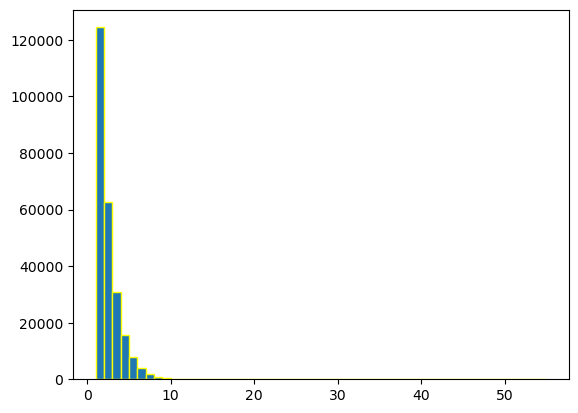

In [275]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(perfectmm_counted[0], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Win Streaks

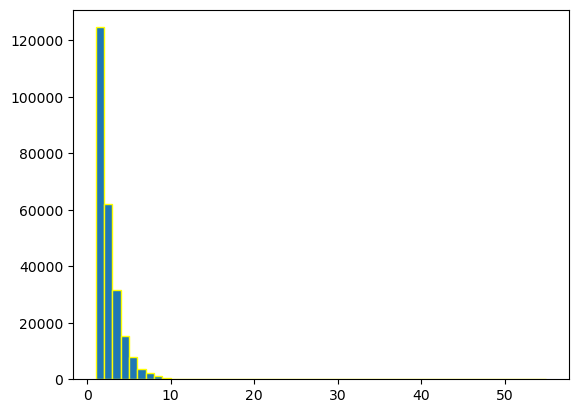

In [276]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(perfectmm_counted[1], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Combined

In [277]:
streak_sizes_comb = []
frequencies_comb = []

streak_sizes_0 = sorted(list(perfect_dict_0.keys()))
streak_sizes_0 = list(np.arange(min(streak_sizes_0), max(streak_sizes_0)+1, 1))
frequencies_0 = [perfect_dict_0[x] for x in streak_sizes_0][::-1]

streak_sizes_0 = sorted([x*(-1) for x in streak_sizes_0])
# frequencies_0 = frequencies_0[::-1]

print(streak_sizes_0)
print(frequencies_0)

streak_sizes_1 = sorted(list(perfect_dict_1.keys()))
streak_sizes_1 = list(np.arange(min(streak_sizes_1), max(streak_sizes_1)+1, 1))
frequencies_1 = [perfect_dict_1[x] for x in streak_sizes_1]

print(streak_sizes_1)
print(frequencies_1)

streak_sizes_comb.extend(streak_sizes_0)
streak_sizes_comb.extend(streak_sizes_1)
frequencies_comb.extend(frequencies_0)
frequencies_comb.extend(frequencies_1)

print(streak_sizes_comb)
print(frequencies_comb)

[-17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
[3, 4, 9, 24, 28, 55, 111, 248, 461, 979, 2003, 3955, 7940, 15672, 30936, 62676, 124404]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[124601, 62144, 31575, 15466, 7824, 3812, 2093, 1013, 523, 228, 104, 58, 39, 12, 6, 6, 2, 1, 0, 2]
[-17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[3, 4, 9, 24, 28, 55, 111, 248, 461, 979, 2003, 3955, 7940, 15672, 30936, 62676, 124404, 124601, 62144, 31575, 15466, 7824, 3812, 2093, 1013, 523, 228, 104, 58, 39, 12, 6, 6, 2, 1, 0, 2]


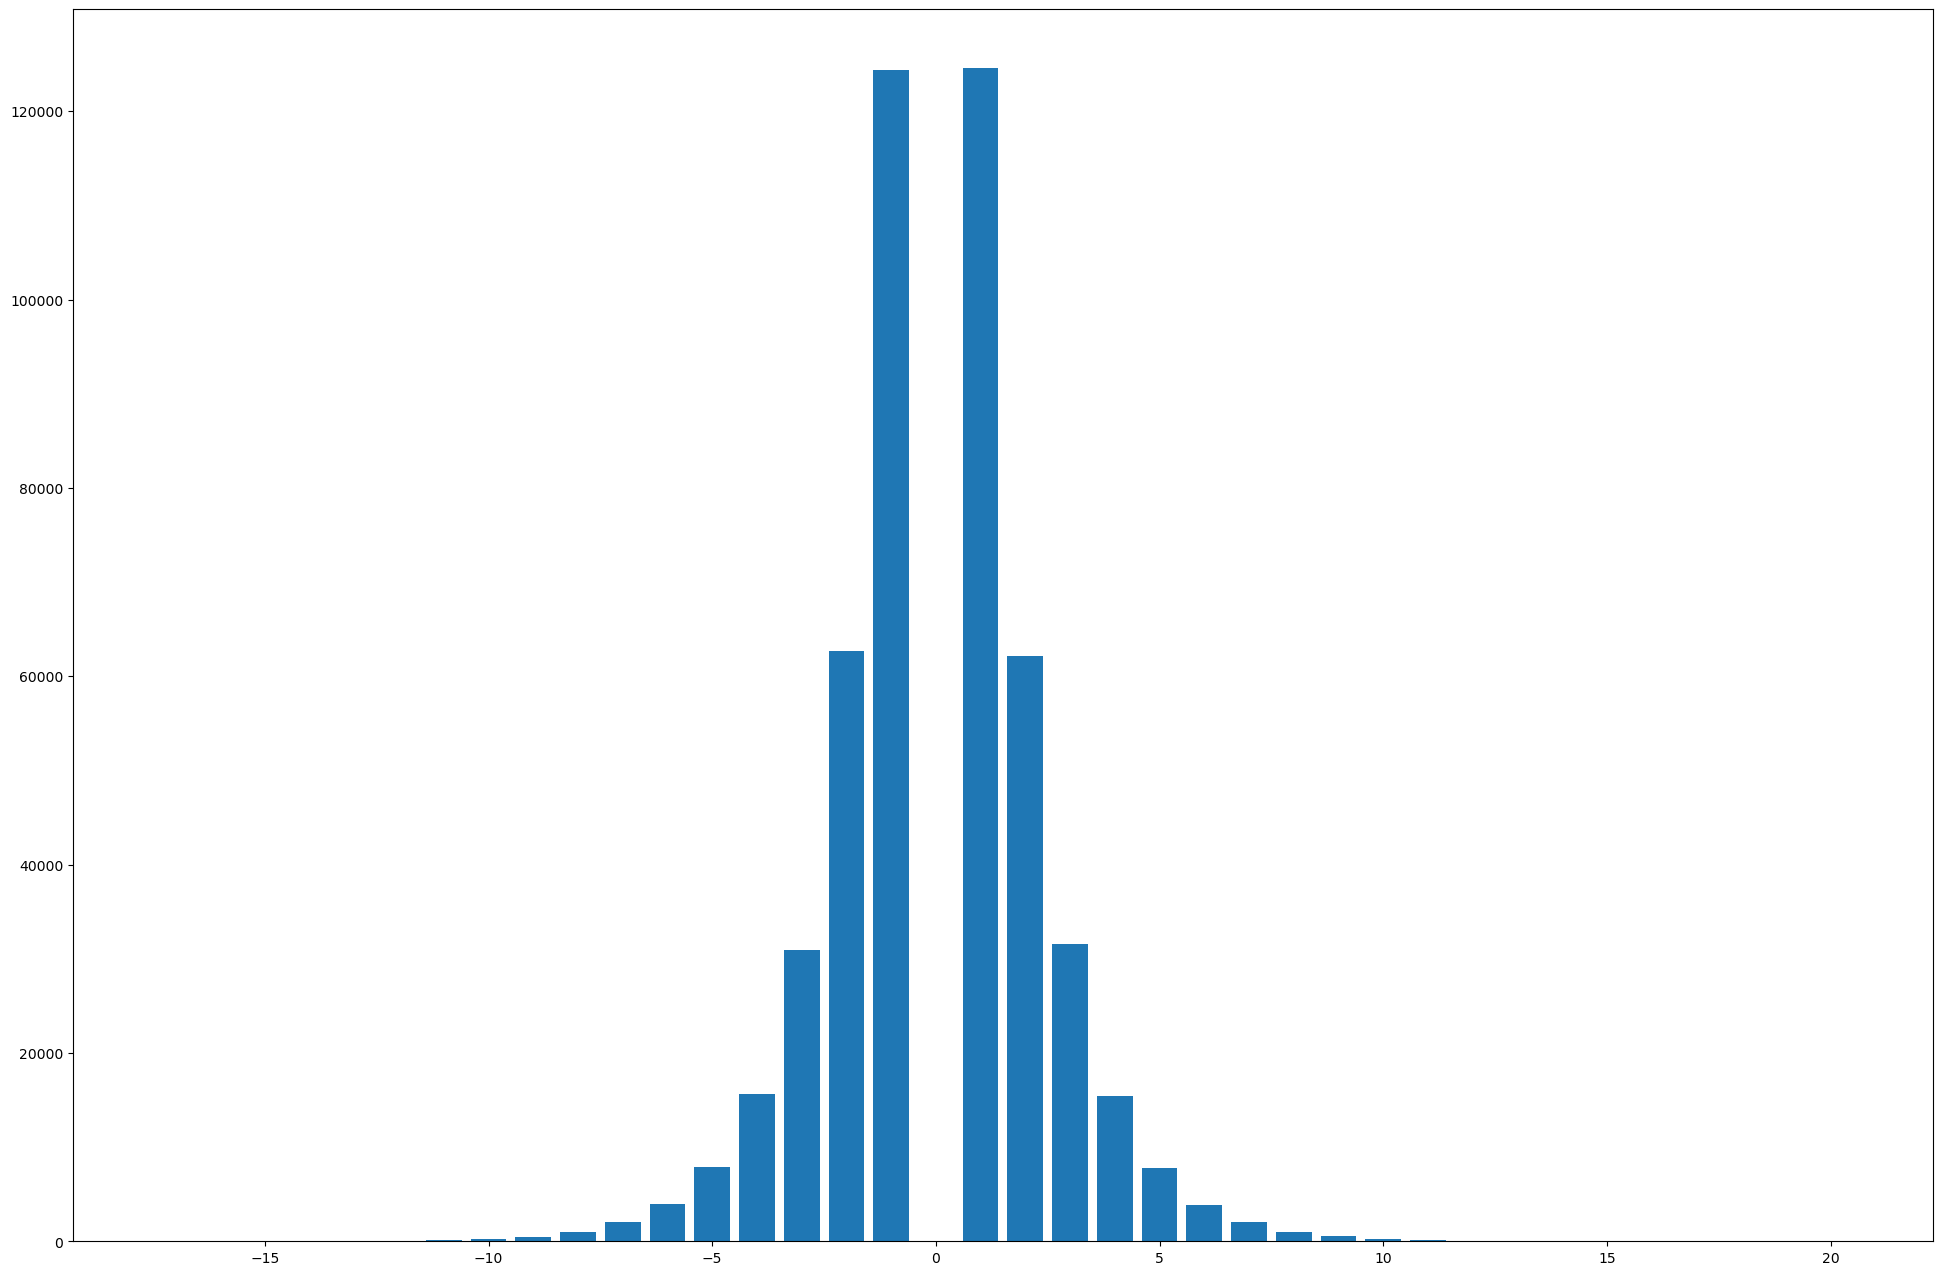

In [278]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes_comb, frequencies_comb)
# plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
# addlabels(streak_sizes_comb, frequencies_comb)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

In [279]:
streaks = []

streaks_0 = list(perfectmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(perfectmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))


perfectmm_streak_comb_avg = np.mean(streaks)
perfectmm_streak_comb_sd = np.std(streaks)

# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-2, -1, -1, -5, -1, -3, -1, -1, -2, -2, -2, -1, -1, -2, -1, -1, -1, -1, -1, -4]
-2.003923721884669
1.4168229150676865
[1, 2, 2, 1, 3, 1, 3, 4, 2, 6, 1, 1, 2, 4, 1, 5, 5, 1, 1, 7]
2.0039557691305725
1.419380547217041
----
2.003939745539731e-05
2.4549518663543686


## NearPerfectMM

### Losing Streaks

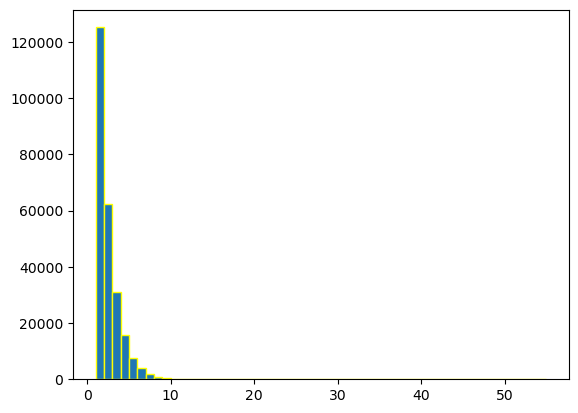

In [280]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(nearperfectmm_counted[0], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Win Streaks

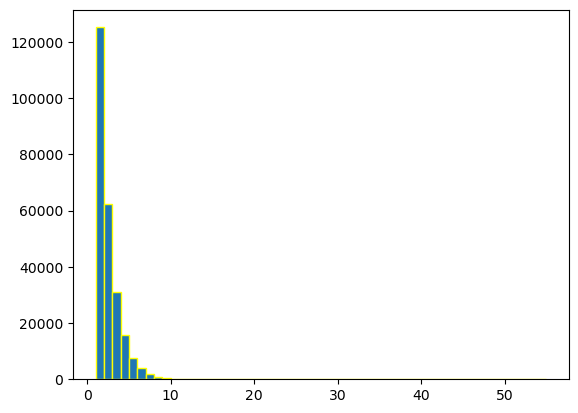

In [281]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(nearperfectmm_counted[0], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Combined

In [282]:
streak_sizes_comb = []
frequencies_comb = []

streak_sizes_0 = sorted(list(nearperfect_dict_0.keys()))
streak_sizes_0 = list(np.arange(min(streak_sizes_0), max(streak_sizes_0)+1, 1))
frequencies_0 = [nearperfect_dict_0[x] for x in streak_sizes_0][::-1]

streak_sizes_0 = sorted([x*(-1) for x in streak_sizes_0])
# frequencies_0 = frequencies_0[::-1]

print(streak_sizes_0)
print(frequencies_0)

streak_sizes_1 = sorted(list(nearperfect_dict_1.keys()))
streak_sizes_1 = list(np.arange(min(streak_sizes_1), max(streak_sizes_1)+1, 1))
frequencies_1 = [nearperfect_dict_1[x] for x in streak_sizes_1]

print(streak_sizes_1)
print(frequencies_1)

streak_sizes_comb.extend(streak_sizes_0)
streak_sizes_comb.extend(streak_sizes_1)
frequencies_comb.extend(frequencies_0)
frequencies_comb.extend(frequencies_1)

print(streak_sizes_comb)
print(frequencies_comb)

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
[1, 0, 0, 1, 4, 8, 10, 34, 77, 117, 254, 476, 961, 1916, 4078, 7717, 15849, 31120, 62204, 125225]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[125231, 62650, 30970, 15522, 7842, 3902, 1946, 1003, 493, 274, 107, 56, 21, 20, 8, 3, 1, 2, 0, 0, 0, 0, 1]
[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[1, 0, 0, 1, 4, 8, 10, 34, 77, 117, 254, 476, 961, 1916, 4078, 7717, 15849, 31120, 62204, 125225, 125231, 62650, 30970, 15522, 7842, 3902, 1946, 1003, 493, 274, 107, 56, 21, 20, 8, 3, 1, 2, 0, 0, 0, 0, 1]


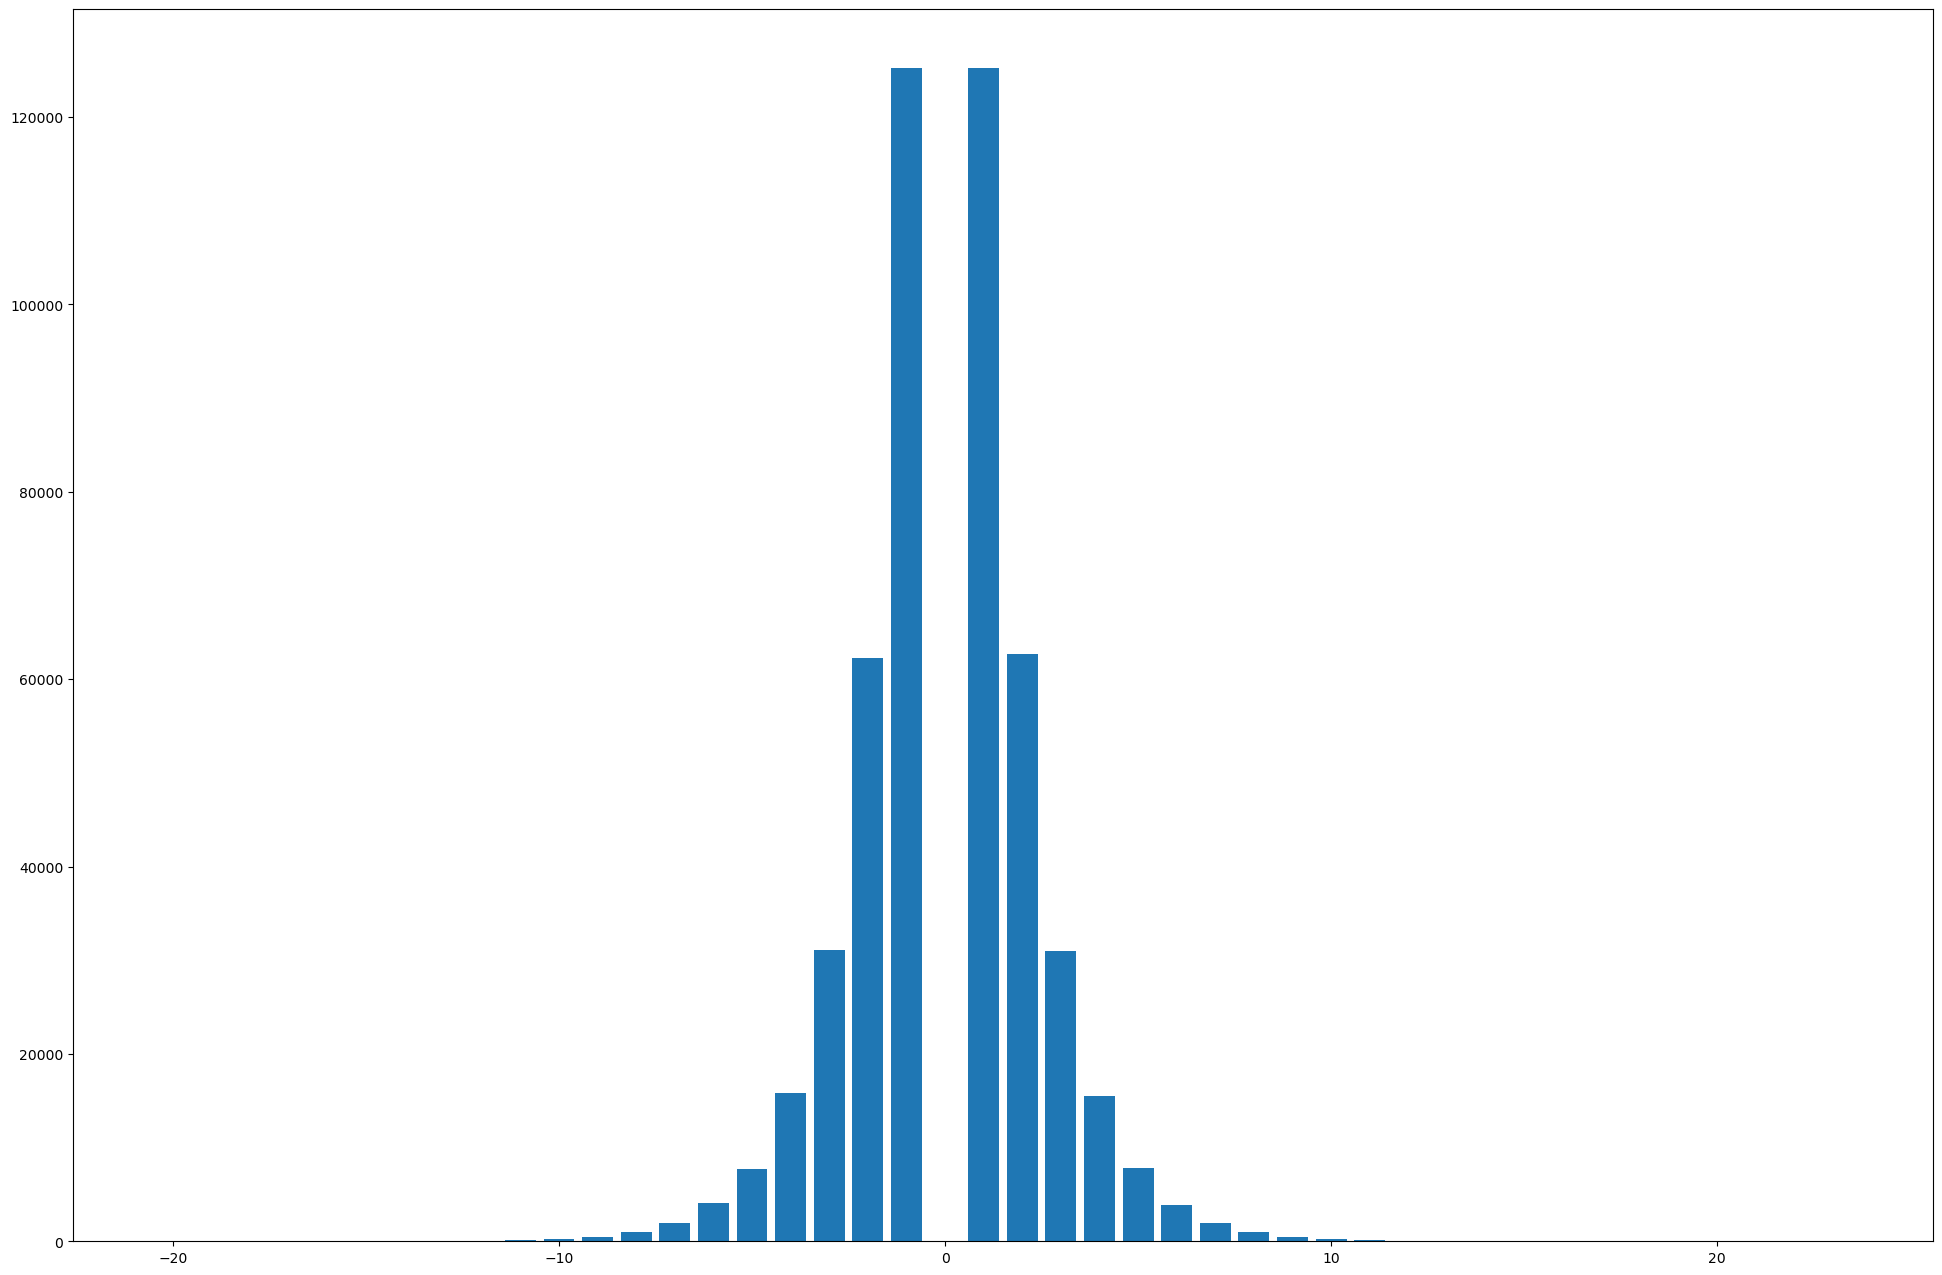

In [283]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes_comb, frequencies_comb)
# plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
# addlabels(streak_sizes_comb, frequencies_comb)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

In [284]:
streaks = []

streaks_0 = list(nearperfectmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(nearperfectmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))

nearperfectmm_streak_comb_avg = np.mean(streaks)
nearperfectmm_streak_comb_sd = np.std(streaks)


# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-1, -1, -1, -3, -1, -2, -2, -2, -2, -2, -2, -1, -2, -1, -4, -1, -1, -3, -2, -1]
-2.0011037704157535
1.4167982423222778
[3, 2, 1, 2, 2, 2, 4, 1, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1]
1.9980644026042582
1.4148511856294026
----
-0.0015196839057476045
2.450081036922303


## StreakMM

### Losing Streaks

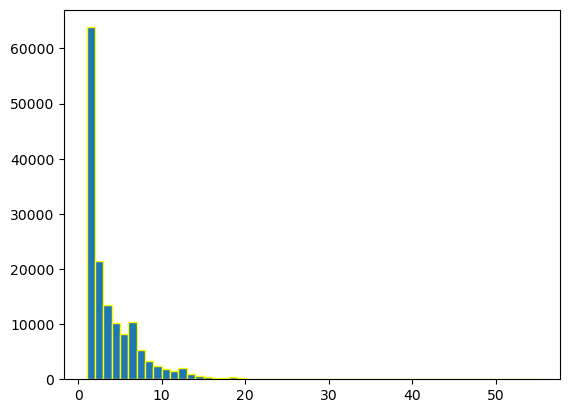

In [285]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(streakmm_counted[0], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Win Streaks

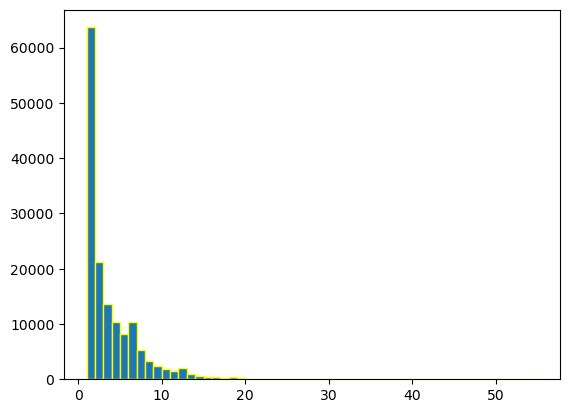

In [286]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(streakmm_counted[1], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Combined

In [287]:
streak_sizes_comb = []
frequencies_comb = []

streak_sizes_0 = sorted(list(streak_dict_0.keys()))
streak_sizes_0 = list(np.arange(min(streak_sizes_0), max(streak_sizes_0)+1, 1))
frequencies_0 = [streak_dict_0[x] for x in streak_sizes_0][::-1]

streak_sizes_0 = sorted([x*(-1) for x in streak_sizes_0])
# frequencies_0 = frequencies_0[::-1]

print(streak_sizes_0)
print(frequencies_0)

streak_sizes_1 = sorted(list(streak_dict_1.keys()))
streak_sizes_1 = list(np.arange(min(streak_sizes_1), max(streak_sizes_1)+1, 1))
frequencies_1 = [streak_dict_1[x] for x in streak_sizes_1]

print(streak_sizes_1)
print(frequencies_1)

streak_sizes_comb.extend(streak_sizes_0)
streak_sizes_comb.extend(streak_sizes_1)
frequencies_comb.extend(frequencies_0)
frequencies_comb.extend(frequencies_1)

print(streak_sizes_comb)
print(frequencies_comb)

[-52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 7, 3, 6, 13, 14, 13, 15, 12, 37, 63, 56, 76, 82, 103, 205, 377, 300, 316, 467, 590, 981, 1995, 1586, 1896, 2420, 3398, 5306, 10454, 8198, 10201, 13441, 21473, 63848]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[63688, 21255, 13532, 10327, 8261, 10441, 5374, 3301, 2492, 1874, 1520, 1983, 1021, 644, 480, 358, 270, 392, 198, 128, 79, 77, 60, 71, 36, 30, 16, 6, 7, 10, 8, 4, 2, 5, 0, 5, 3, 1, 1]
[-52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -

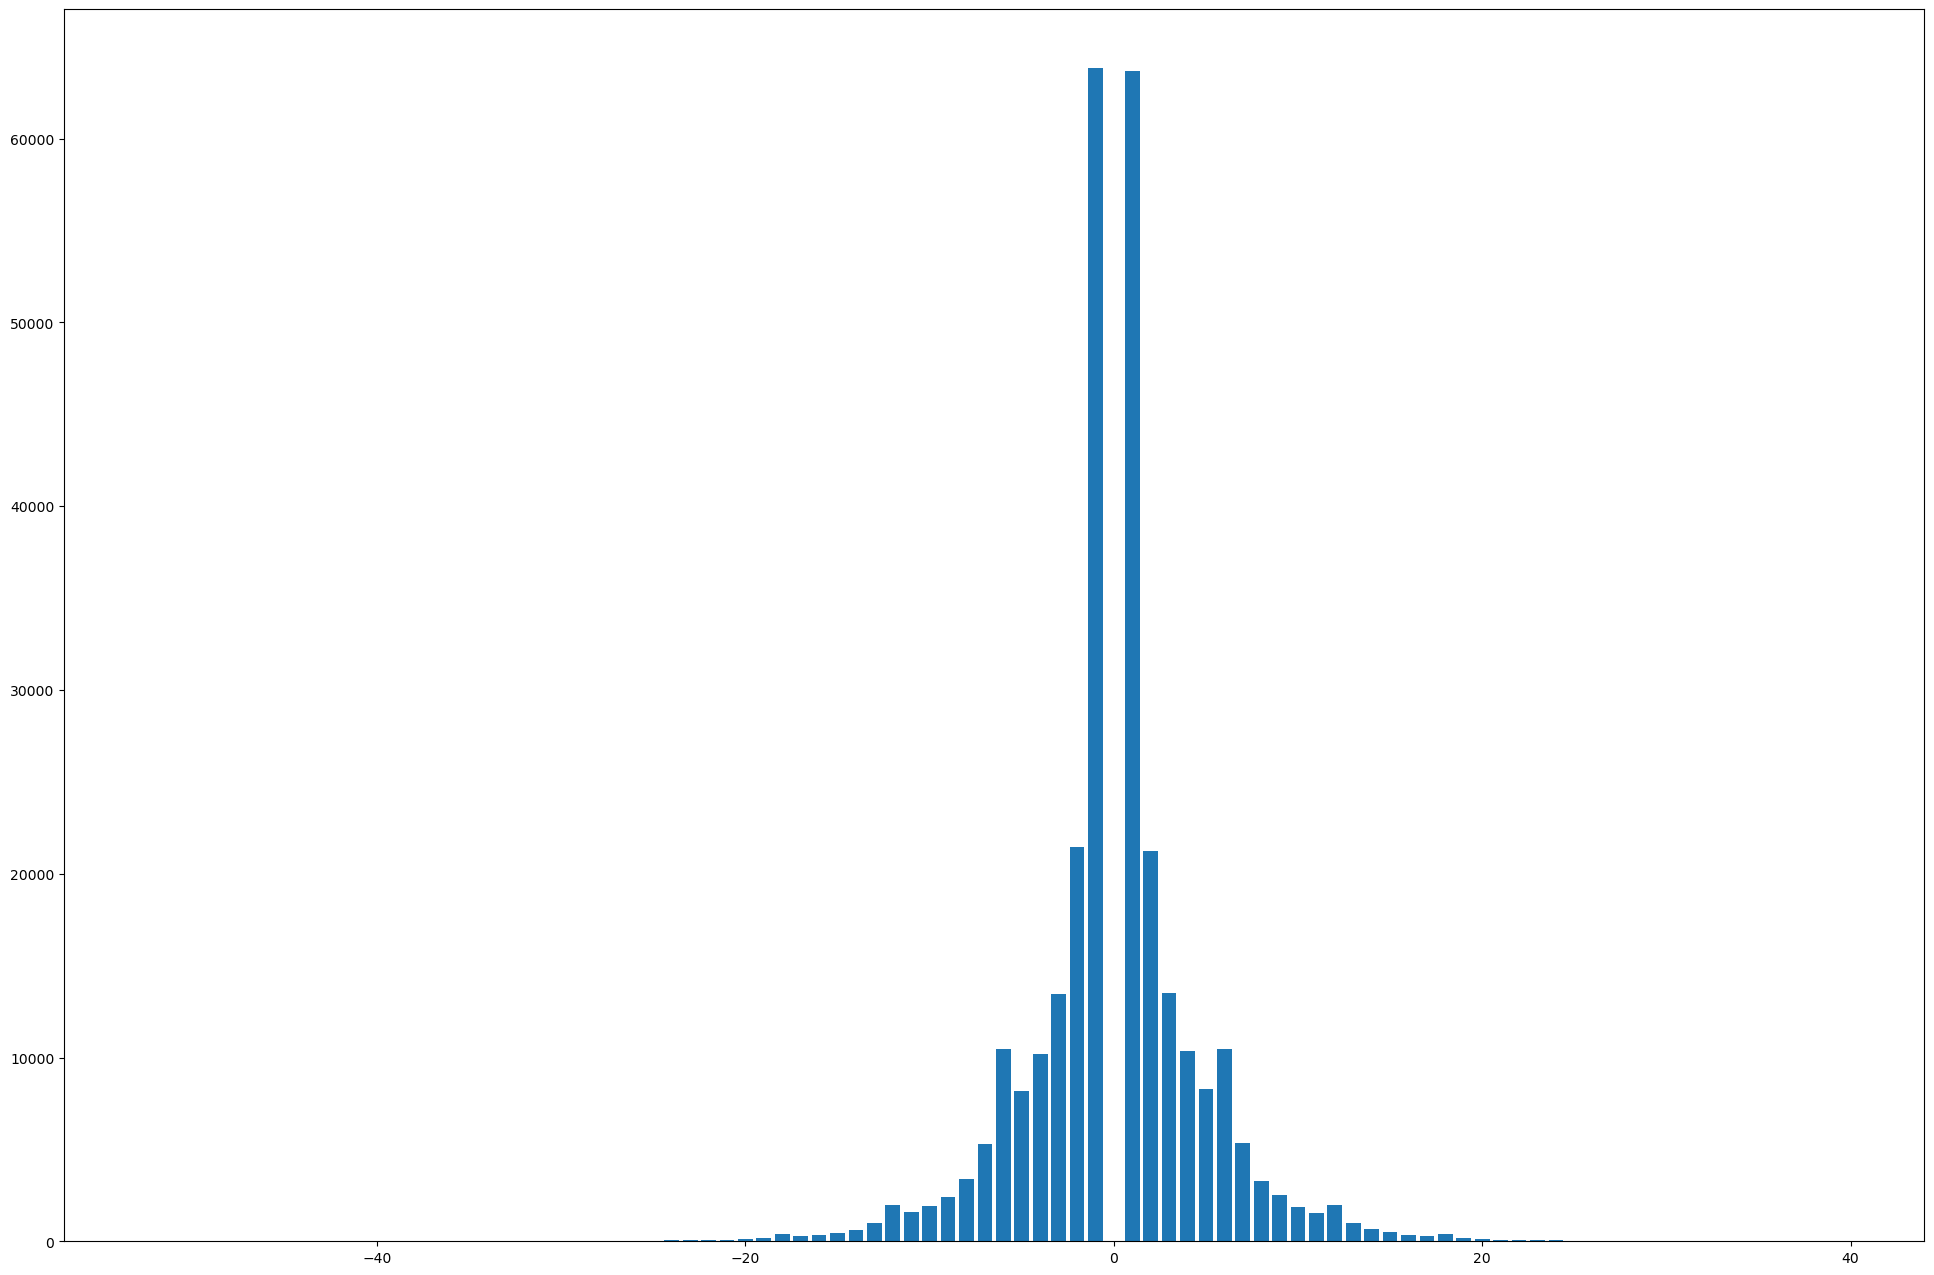

In [288]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes_comb, frequencies_comb)
# plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
# addlabels(streak_sizes_comb, frequencies_comb)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

In [289]:
streaks = []

streaks_0 = list(streakmm_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(streakmm_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))

streakmm_streak_comb_avg = np.mean(streaks)
streakmm_streak_comb_sd = np.std(streaks)


# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-6, -3, -7, -1, -1, -5, -25, -1, -5, -6, -1, -2, -1, -1, -6, -7, -1, -3, -1, -1]
-3.3715100600834003
3.400960275967006
[1, 2, 4, 2, 2, 1, 4, 1, 1, 7, 4, 1, 1, 6, 5, 1, 1, 4, 3, 3]
3.3870505542038387
3.4216191520092782
----
0.007758827524913744
4.8017225415490215


## Live Data

### Losing Streaks

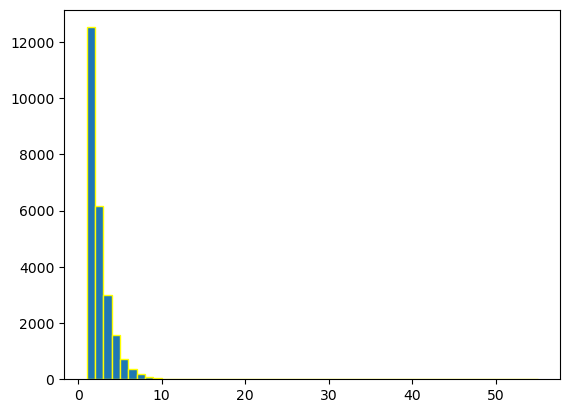

In [290]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(live_data_counted[0], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Win Streaks

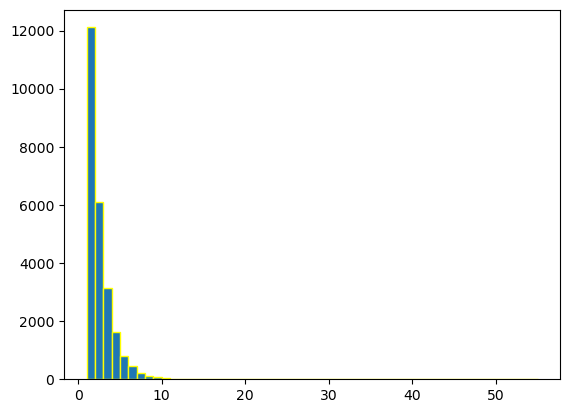

In [291]:
# plt.hist(perfectmm_counted[0], bins=30)
plt.hist(live_data_counted[1], edgecolor='yellow', bins=np.arange(1, 56, 1))
# plt.hist(perfectmm_counted[0], bins=np.arange(1, 56, 1), width=1)
plt.show()

### Combined

In [292]:
streak_sizes_comb = []
frequencies_comb = []

streak_sizes_0 = sorted(list(streak_dict_0.keys()))
streak_sizes_0 = list(np.arange(min(streak_sizes_0), max(streak_sizes_0)+1, 1))
frequencies_0 = [live_data_dict_0[x] for x in streak_sizes_0][::-1]

streak_sizes_0 = sorted([x*(-1) for x in streak_sizes_0])
# frequencies_0 = frequencies_0[::-1]

print(streak_sizes_0)
print(frequencies_0)

streak_sizes_1 = sorted(list(streak_dict_1.keys()))
streak_sizes_1 = list(np.arange(min(streak_sizes_1), max(streak_sizes_1)+1, 1))
frequencies_1 = [live_data_dict_1[x] for x in streak_sizes_1]

print(streak_sizes_1)
print(frequencies_1)

streak_sizes_comb.extend(streak_sizes_0)
streak_sizes_comb.extend(streak_sizes_1)
frequencies_comb.extend(frequencies_0)
frequencies_comb.extend(frequencies_1)

print(streak_sizes_comb)
print(frequencies_comb)

[-52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 4, 14, 27, 62, 86, 180, 360, 733, 1562, 3005, 6171, 12517]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[12111, 6090, 3145, 1630, 804, 448, 230, 118, 78, 32, 16, 13, 6, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9

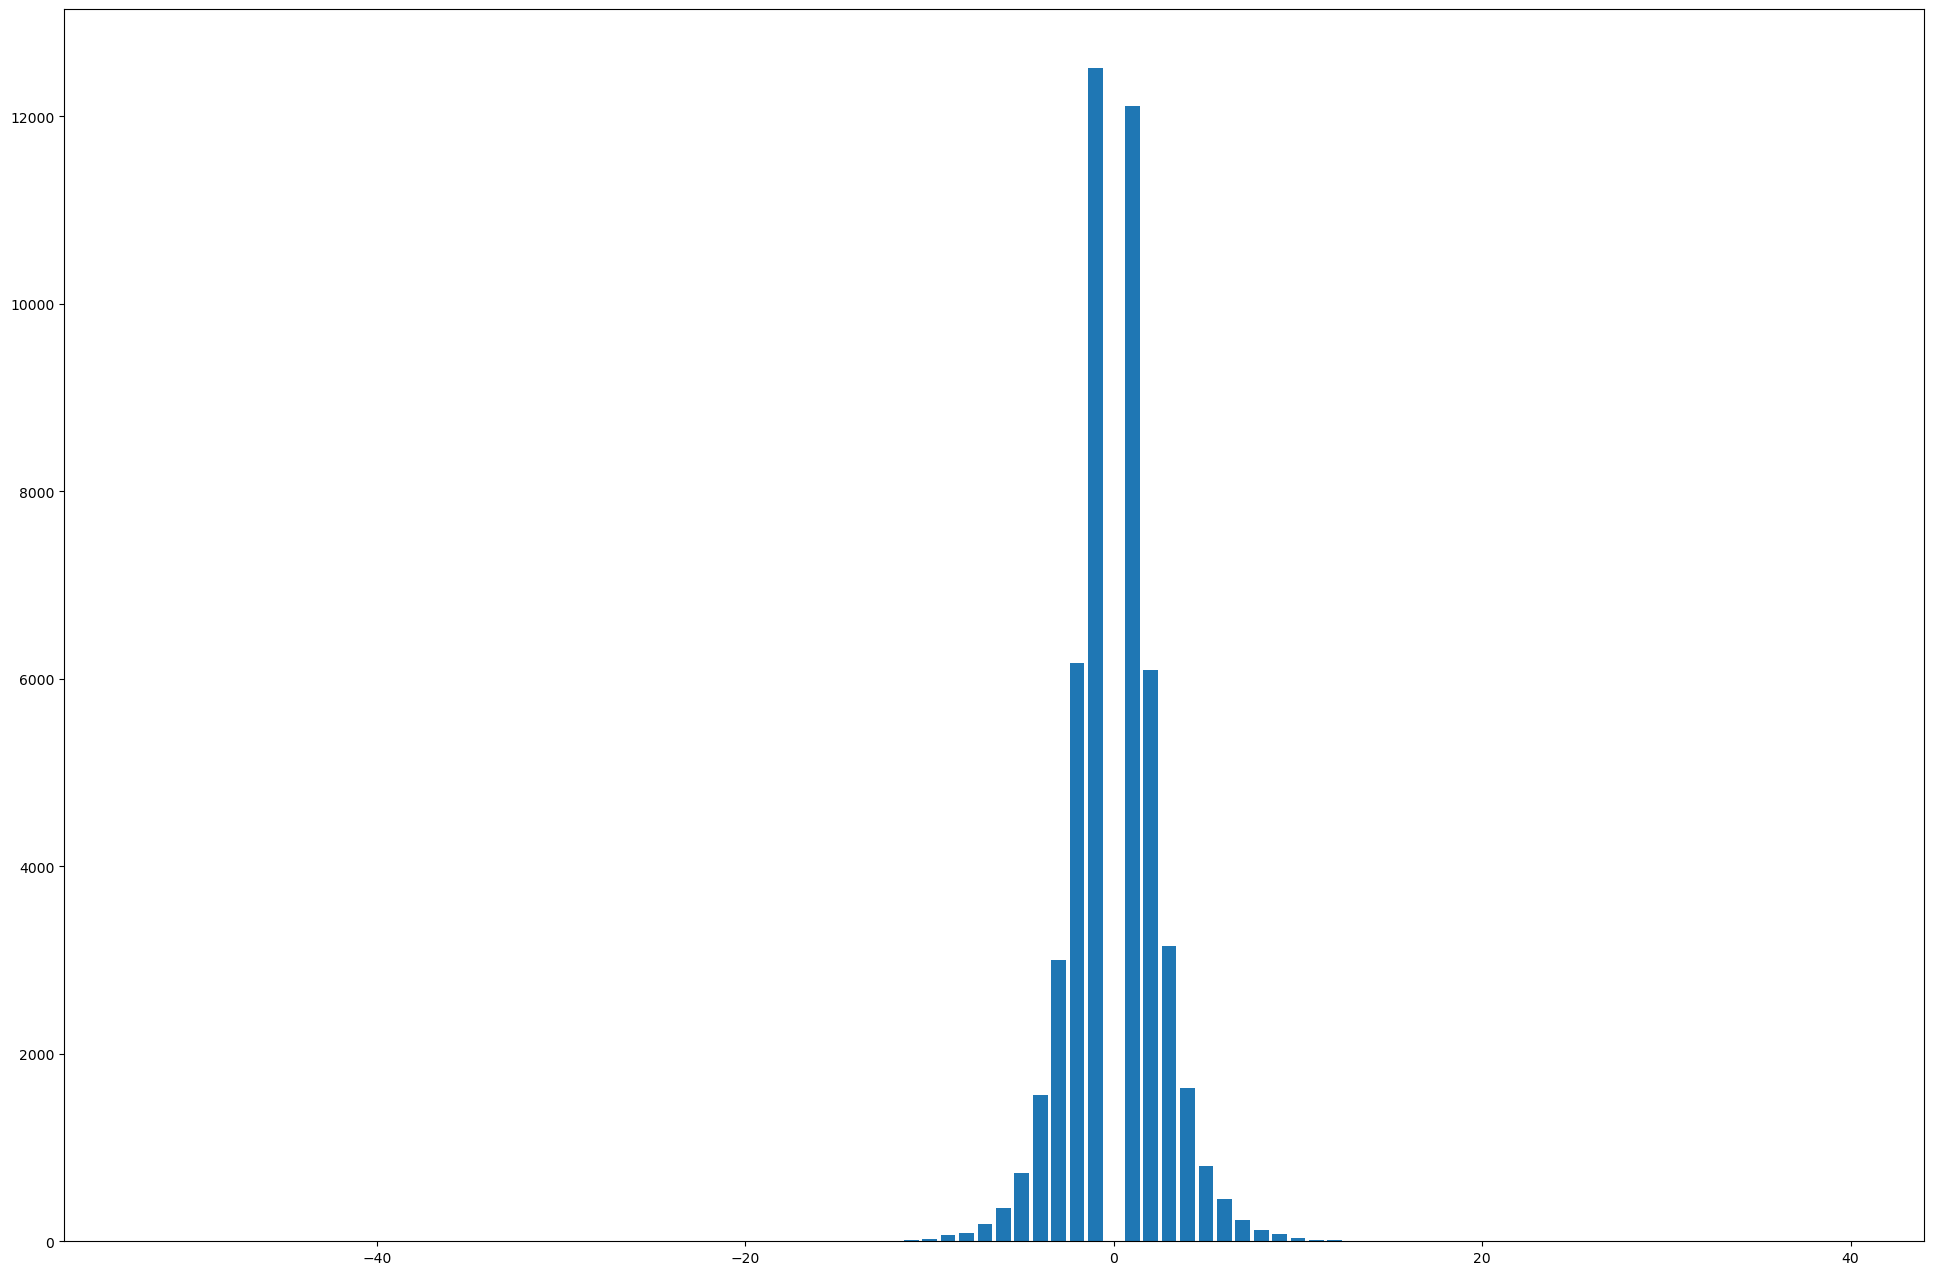

In [293]:
plt.figure(figsize=(24,16))
plt.bar(streak_sizes_comb, frequencies_comb)
# plt.xticks(np.arange(0, 55, 5))
# plt.xticks(np.arange(0, 25, 5))
# addlabels(streak_sizes_comb, frequencies_comb)
# plt.xticks([0].extend(list(np.arange(1, 55, 5))))
# plt.yticks(np.arange(min(y), max(y)+1, 4))
plt.show()

In [294]:
streaks = []

streaks_0 = list(live_data_counted[0])
streaks_0 = [x*(-1) for x in streaks_0]
print(streaks_0[:20])

print(np.mean(streaks_0))
print(np.std(streaks_0))

streaks_1 = list(live_data_counted[1])
print(streaks_1[:20])

print(np.mean(streaks_1))
print(np.std(streaks_1))


print('----')
streaks.extend(streaks_0)
streaks.extend(streaks_1)

print(np.mean(streaks))
print(np.std(streaks))

live_data_streak_comb_avg = np.mean(streaks)
live_data_streak_comb_sd = np.std(streaks)


# llist.extend(list(perfectmm_counted[1]))
# print(len(llist))
# print(llist[:30])

# print(np.mean(llist))
# print(np.std(llist))
# print(np.sum(llist))

[-7, -1, -1, -2, -1, -1, -1, -1, -2, -1, -2, -1, -6, -1, -1, -1, -1, -1, -1, -1]
-1.9816387608185715
1.4050564445199816
[1, 2, 1, 1, 2, 2, 1, 1, 4, 3, 4, 2, 2, 2, 2, 1, 2, 1, 3, 4]
2.0627704752275027
1.5050515575882655
----
0.04052496410588259
2.491784596399239


## F-TEST (One tail)

### Avgs and SDs of MMS

In [295]:
print(perfectmm_streak_comb_avg)
print(perfectmm_streak_comb_sd)

print(nearperfectmm_streak_comb_avg)
print(nearperfectmm_streak_comb_sd)

print(streakmm_streak_comb_avg)
print(streakmm_streak_comb_sd)



2.003939745539731e-05
2.4549518663543686
-0.0015196839057476045
2.450081036922303
0.007758827524913744
4.8017225415490215


In [296]:
print(live_data_streak_comb_avg)
print(live_data_streak_comb_sd)

0.04052496410588259
2.491784596399239


In [297]:
pop_mean = perfectmm_streak_comb_avg
pop_sd = perfectmm_streak_comb_sd

### PerfectMM vs NearPerfectMM

In [298]:
perfectmm_streak_comb_sd**2/nearperfectmm_streak_comb_sd**2

### 1.003980008033177 // nearperfect seeds: 2237
### 1.0070063955371997 // nearperfect seeds: 2297

1.003980008033177

### NearPerfectMM vs StreakMM

In [299]:
streakmm_streak_comb_sd**2/nearperfectmm_streak_comb_sd**2

3.840901989488378

### PerfectMM vs StreakMM

In [300]:
streakmm_streak_comb_sd**2/perfectmm_streak_comb_sd**2

3.8256757691946524

### Live Data vs PerfectMM

In [301]:
perfectmm_streak_comb_sd**2/live_data_streak_comb_sd**2   ### 0.9706551637542901 // seed = 10

0.9706551637542901

In [302]:
live_data_streak_comb_sd**2/perfectmm_streak_comb_sd**2   ### 1.0302319890126688 // seed = 10

1.0302319890126688

### Live Data vs StreakMM

In [303]:
streakmm_streak_comb_sd**2/live_data_streak_comb_sd**2

3.7134119402184544

All bigger than 1

https://statisticsbyjim.com/hypothesis-testing/f-table/

### With different random seeds for sampling from live data DF

In [320]:
# random.sample([num for num in range(1, 500)] , 20)

### [71, 475, 389, 19, 398, 305, 229, 10, 332, 360, 301, 12, 140, 116, 470, 369, 16, 476, 440, 486]

In [326]:
# random_seeds = [10]
random_seeds = [71, 475, 389, 19, 398, 305, 229, 10, 332, 360, 301, 12, 140, 116, 470, 369, 16, 476, 440, 486]   ### 1.5 secs

# random_seeds = random.sample([num for num in range(1, 1000)] , 200)
# random_seeds = random.sample([num for num in range(1, 5000)] , 2000)


In [327]:
start = time()
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))
print('\n')
##############################################################################################################################


perfect_over_live_list = []


for i in range(len(random_seeds)):
    one_seed = random_seeds[i]
    # print(f'Seed {i+1}: {one_seed}')

    one_million_live = list(df_live.sample(3334, random_state=one_seed)[[str(x) for x in range(300)]].to_numpy().flatten())[:100000]
    
    # # 42127 = all
    # one_million_live = list(df_live.sample(42127, random_state=one_seed)[[str(x) for x in range(300)]].to_numpy().flatten())
    
    live_data_counted = streak_counter(one_million_live)
    
    streaks = []

    streaks_0 = list(live_data_counted[0])
    streaks_0 = [x*(-1) for x in streaks_0]
    # print(streaks_0[:20])

    # print(np.mean(streaks_0))
    # print(np.std(streaks_0))

    streaks_1 = list(live_data_counted[1])
    # print(streaks_1[:20])

    # print(np.mean(streaks_1))
    # print(np.std(streaks_1))


    # print('----')
    streaks.extend(streaks_0)
    streaks.extend(streaks_1)

    # print(np.mean(streaks))
    # print(np.std(streaks))

    live_data_streak_comb_avg = np.mean(streaks)
    live_data_streak_comb_sd = np.std(streaks)
    
    
    perfect_over_live = perfectmm_streak_comb_sd**2/live_data_streak_comb_sd**2
    live_over_perfect = live_data_streak_comb_sd**2/perfectmm_streak_comb_sd**2
    
    perfect_over_live_list.append(perfect_over_live)
    
    # print('PerfectMM / Live Data')
    # print(perfect_over_live)
    # print('Live Data / PerfectMM')
    # print(live_over_perfect)
    # print('StreakMM / Live Data')
    # print(streakmm_streak_comb_sd**2/live_data_streak_comb_sd**2)
    # print('-----------')
    
    
##############################################################################################################################
print('\n----------------------------------------------------')
print("done in %0.3fs." % (time() - start))
print(strftime('%Y-%m-%d %H:%M:%S', localtime()))

2024-07-24 18:10:14



----------------------------------------------------
done in 1.644s.
2024-07-24 18:10:15


In [328]:
reject_count = 0

for item in perfect_over_live_list:
    if item < 1:
        reject_count += 1
        
print(reject_count)

20


In [329]:
np.mean(perfect_over_live_list)

0.9651459306499749

In [330]:
perfect_over_live_list

[0.9631279454360074,
 0.9639544570805049,
 0.966243876798276,
 0.9688714806316692,
 0.9516016411495625,
 0.9718042830420933,
 0.9627315035693667,
 0.9706551637542901,
 0.9603907026843068,
 0.9566278109090323,
 0.9639110815989937,
 0.9568266736199852,
 0.9478836159829198,
 0.9568790753341696,
 0.9734173936213388,
 0.9647946514998313,
 0.9748453540079345,
 0.9708777656998697,
 0.9795997005547064,
 0.9778744360246376]

In [331]:
97/100

0.97

In [332]:
100/97

1.0309278350515463

In [333]:
1/0.97

1.0309278350515465

# One Million Games Image (PerfectMM)

In [9]:
type(one_million_games)

list

In [12]:
type(one_million_games[0])

list

In [13]:
one_million_games = one_million_games[0]

In [17]:
one_million_games = np.array(one_million_games).reshape(1000, 1000)

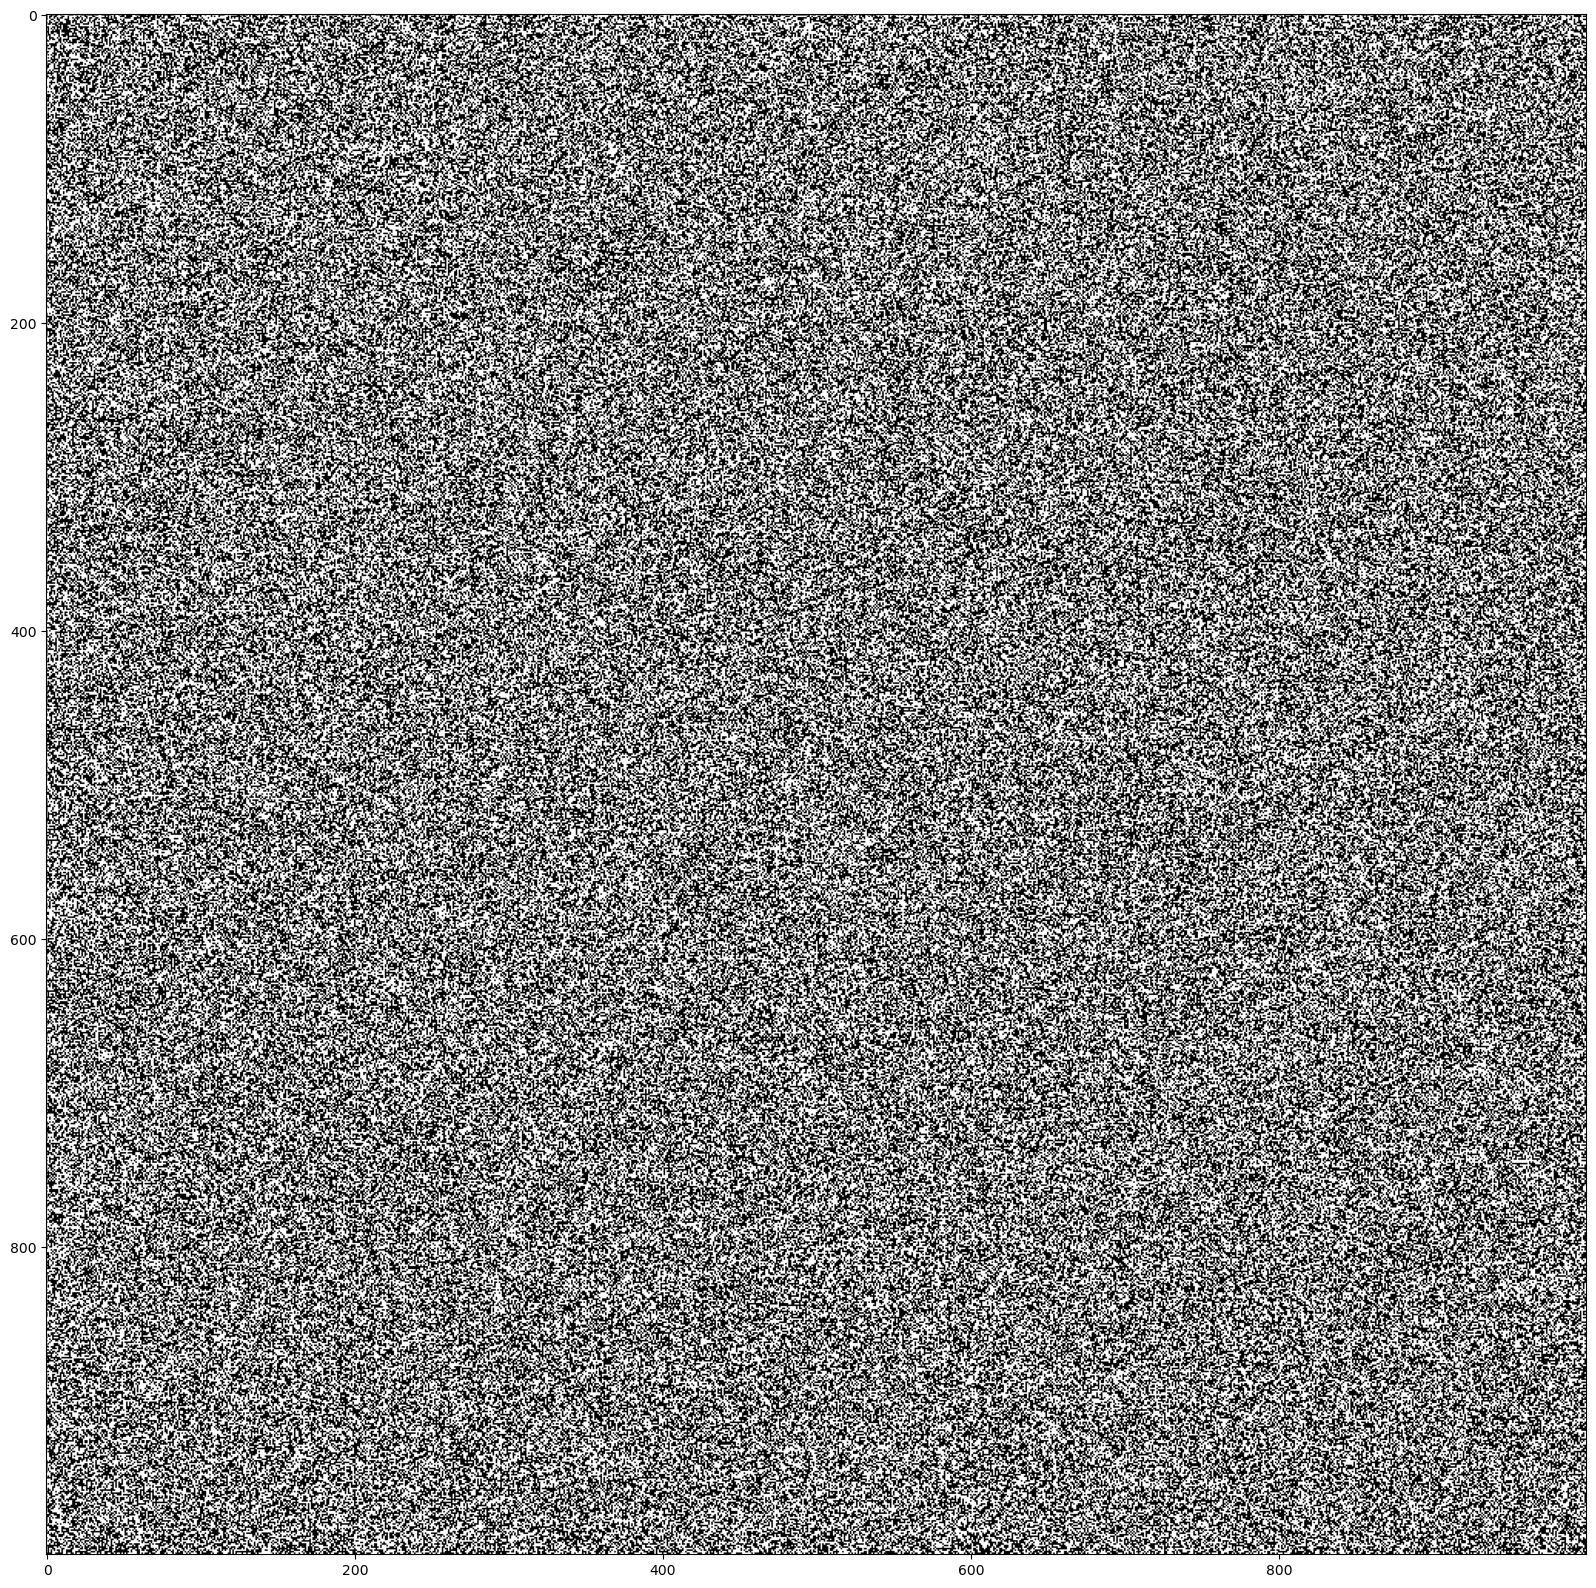

In [18]:
plt.figure(figsize=(20,20))
# plt.figure(figsize=(6,6))
# plt.imshow(data, cmap='viridis')
# plt.imshow(data)
plt.imshow(one_million_games, cmap='binary')
plt.show()